In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import pickle
from yellowbrick.classifier import ConfusionMatrix


In [ ]:
df_census = pd.read_csv('/content/census.csv')

df_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


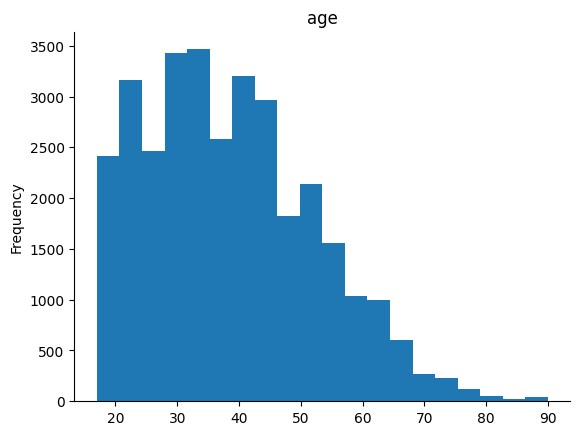

In [ ]:
# @title age

from matplotlib import pyplot as plt
df_census['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
np.unique(df_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

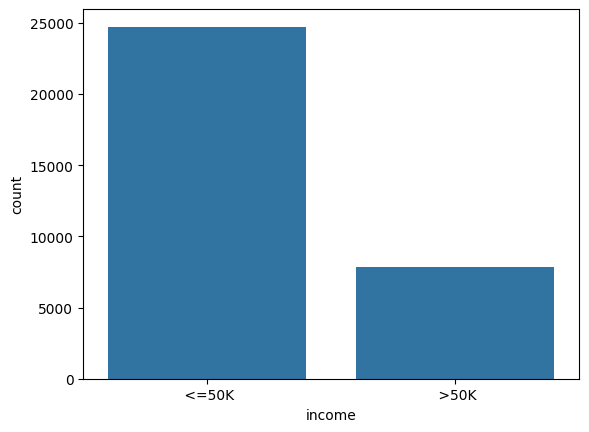

In [ ]:
sns.countplot(x='income', data=df_census);

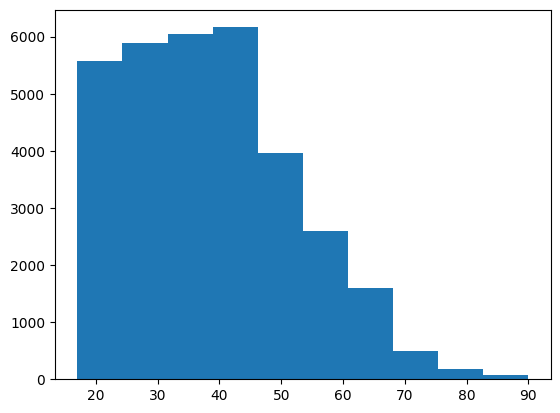

In [ ]:
plt.hist(x = df_census['age'] );

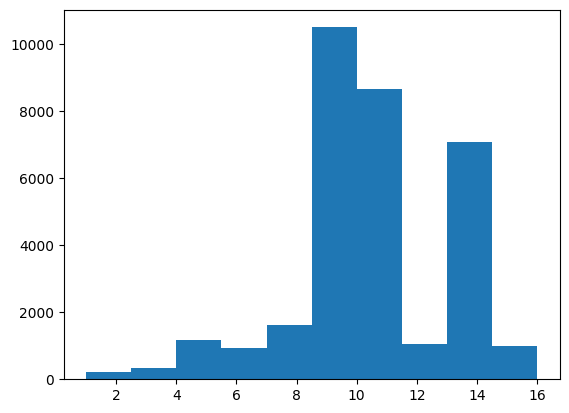

In [ ]:
plt.hist(x = df_census['education-num'] );

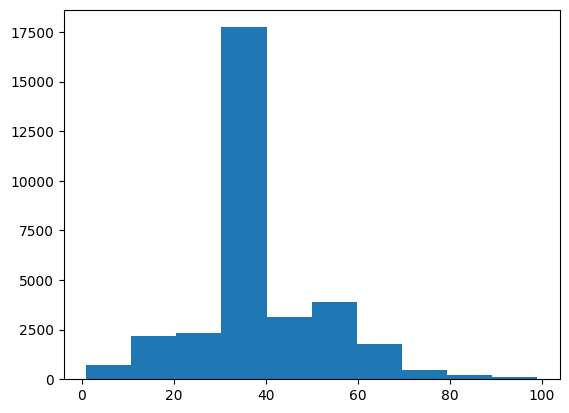

In [ ]:
plt.hist(x = df_census['hour-per-week']);

In [ ]:
grafico = px.treemap(df_census, path=['workclass', 'income'])
grafico.show()

In [ ]:
grafico = px.treemap(df_census, path=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(df_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(df_census, dimensions=['workclass','occupation', 'income'])
grafico.show()

In [ ]:
x_census = df_census.iloc[:, 0:14].values
y_census = df_census.iloc[:, 14].values

In [ ]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
label__enconder_teste = LabelEncoder()
teste = label__enconder_teste.fit_transform(x_census[:,1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label__enconder_marital = LabelEncoder()
label_enconder_occupation = LabelEncoder()
label_enconder_relationship = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex = LabelEncoder()
label_enconder_country = LabelEncoder()
#

In [ ]:
x_census[:,1] = label_enconder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_enconder_education.fit_transform(x_census[:,3])
x_census[:,5] = label__enconder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_enconder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_enconder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_enconder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_enconder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_enconder_country.fit_transform(x_census[:,13])

In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
OneHotEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
x_census = OneHotEncoder.fit_transform(x_census).toarray()
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size=0.15, random_state=0)

In [ ]:
x_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

In [2]:
import pickle
with open('census.pkl', mode='rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)



In [3]:
 x_census_treinamento.shape , y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [6]:
from os import preadv
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [7]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

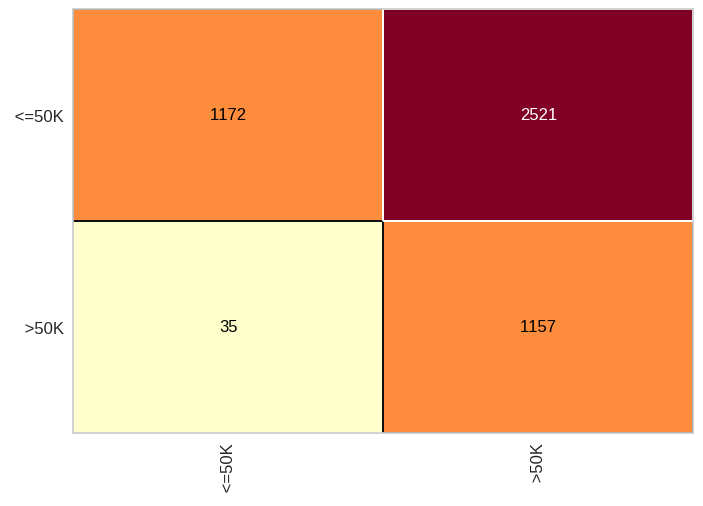

In [13]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [14]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

